# KRX 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



* CoreDotFinanace(1.0.3) - https://coredottoday.github.io/CoreDotFinance/
* pandas-datareader - https://pandas-datareader.readthedocs.io/en/latest/
* FinanceDataReader - https://financedata.github.io/posts/finance-data-reader-users-guide.html


In [2]:
# !pip install finance-datareader
!pip install pandas-datareader
!pip install coredotfinance==1.0.3

     |████████████████████████████████| 58 kB 4.1 MB/s 
     |████████████████████████████████| 20.6 MB 1.2 MB/s 
     |████████████████████████████████| 115 kB 50.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
import coredotfinance
coredotfinance.__version__

'1.0.3'

In [4]:
import pandas as pd
pd.options.plotting.backend = 'plotly'

In [5]:
from coredotfinance.data import KrxReader

apiKey = 'b9d812208d533023d792c20df9bed972'
krx = KrxReader(api_key=apiKey)
# krx = KrxReader()

In [6]:
def search_company(corp):
    return company_info[company_info['회사명'].str.contains(corp)]

def get_code(corp):
    return str(company_info[company_info['회사명'] == corp]['종목코드'].values[0]).zfill(6)

In [7]:
start = '2015-01-01'
end = '2021-06-30'

# 기업 코드

In [8]:
company_info = pd.read_html('https://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]

# 주요제품 결측치 처리
company_info['주요제품'] = company_info['주요제품'].fillna('-')

In [9]:
company_info.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
1,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
2,GS글로벌,1250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"권순호, 정경구",http://www.hdc-dvp.com,서울특별시
4,KEC,92220,반도체 제조업,반도체 제조,2006-10-16,12월,박남규 김학남,http://www.kec.co.kr,서울특별시


# DataFrame 작성

In [10]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Stock/Source/자동차업계.csv'

In [11]:
stock = pd.read_csv(file_path)
stock = stock.rename(columns={"Unnamed: 0":'날짜'})
stock.sort_index(axis=1, ascending=True, inplace=True)
print(stock.shape)
stock

(159994, 13)


,날짜,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,기업명,기업코드
0,2021-06-30,89600,100,0.11,89500,90200,89200,1532598,137219994800,36320555891200,405363347,기아,270
1,2021-06-29,89500,0,0.00,90000,91300,89100,1631173,146716869300,36280019556500,405363347,기아,270
2,2021-06-28,89500,-1200,-1.32,91100,91200,89100,1889876,169325403700,36280019556500,405363347,기아,270
3,2021-06-25,90700,100,0.11,91300,91500,89700,1821258,164913707300,36766455572900,405363347,기아,270
4,2021-06-24,90600,400,0.44,91000,93700,90300,4353794,401006917400,36725919238200,405363347,기아,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159989,2015-05-12,17600,-400,-2.22,17950,18200,17400,199870,3554912300,160726068800,9132163,우리산업,215360
159990,2015-05-11,18000,250,1.41,17850,18500,17050,473743,8463149850,164378934000,9132163,우리산업,215360
159991,2015-05-08,17750,950,5.65,16950,17800,16450,383330,6578937850,162095893250,9132163,우리산업,215360
159992,2015-05-07,16800,1200,7.69,16350,17900,16000,942417,15883775200,153420338400,9132163,우리산업,215360


## 각 기업별 종가로 Label DataFrame 구성

In [12]:
# 각 기업별 종가로 DataFrame 구성
kia_df = stock.loc[stock['기업명']=='기아', ['종가']]
kia_df.rename({'종가':'기아 종가'}, axis=1, inplace=True)
kia_df.reset_index(drop=True, inplace=True)

hyundai_df = stock.loc[stock['기업명']=='현대자동차', ['종가']]
hyundai_df.rename({'종가':'현대자동차 종가'}, axis=1, inplace=True)
hyundai_df.reset_index(drop=True, inplace=True)

dy_df = stock.loc[stock['기업명']=='덕양산업', ['종가']]
dy_df.rename({'종가':'덕양산업 종가'}, axis=1, inplace=True)
dy_df.reset_index(drop=True, inplace=True)

md_df = stock.loc[stock['기업명']=='만도', ['종가']]
md_df.rename({'종가':'만도 종가'}, axis=1, inplace=True)
md_df.reset_index(drop=True, inplace=True)

closing_price_df = pd.concat([kia_df, hyundai_df, dy_df, md_df], axis=1)
closing_price_df

,기아 종가,현대자동차 종가,덕양산업 종가,만도 종가
0,89600,239500,4300,66500
1,89500,239500,4260,66000
2,89500,241000,4250,65800
3,90700,243000,4245,65600
4,90600,242500,4060,66100
...,...,...,...,...
1593,52200,178000,2675,181000
1594,51800,170000,2610,177500
1595,51200,164500,2480,179000
1596,52000,168000,2605,182000


## 각 기업별로 시가, 고가, 저가 그리고 거래량으로 Feature DataFrame 구성

In [13]:
# 각 기업별 시가로 DataFrame 구성
kia_df = stock.loc[stock['기업명']=='기아', ['시가']]
kia_df.rename({'시가':'기아 시가'}, axis=1, inplace=True)
kia_df.reset_index(drop=True, inplace=True)

hyundai_df = stock.loc[stock['기업명']=='현대자동차', ['시가']]
hyundai_df.rename({'시가':'현대자동차 시가'}, axis=1, inplace=True)
hyundai_df.reset_index(drop=True, inplace=True)

dy_df = stock.loc[stock['기업명']=='덕양산업', ['시가']]
dy_df.rename({'시가':'덕양산업 시가'}, axis=1, inplace=True)
dy_df.reset_index(drop=True, inplace=True)

md_df = stock.loc[stock['기업명']=='만도', ['시가']]
md_df.rename({'시가':'만도 시가'}, axis=1, inplace=True)
md_df.reset_index(drop=True, inplace=True)

current_price_df = pd.concat([kia_df, hyundai_df, dy_df, md_df], axis=1)
current_price_df

,기아 시가,현대자동차 시가,덕양산업 시가,만도 시가
0,89500,240000,4240,66000
1,90000,240500,4205,65800
2,91100,244000,4280,65900
3,91300,243500,4095,66300
4,91000,243500,4075,67000
...,...,...,...,...
1593,51800,172500,2650,177500
1594,50500,163000,2455,179500
1595,51500,166500,2605,180000
1596,52200,171000,2645,180500


In [14]:
# 각 기업별 고가로 DataFrame 구성
kia_df = stock.loc[stock['기업명']=='기아', ['고가']]
kia_df.rename({'고가':'기아 고가'}, axis=1, inplace=True)
kia_df.reset_index(drop=True, inplace=True)

hyundai_df = stock.loc[stock['기업명']=='현대자동차', ['고가']]
hyundai_df.rename({'고가':'현대자동차 고가'}, axis=1, inplace=True)
hyundai_df.reset_index(drop=True, inplace=True)

dy_df = stock.loc[stock['기업명']=='덕양산업', ['고가']]
dy_df.rename({'고가':'덕양산업 고가'}, axis=1, inplace=True)
dy_df.reset_index(drop=True, inplace=True)

md_df = stock.loc[stock['기업명']=='만도', ['고가']]
md_df.rename({'고가':'만도 고가'}, axis=1, inplace=True)
md_df.reset_index(drop=True, inplace=True)

highest_price_df = pd.concat([kia_df, hyundai_df, dy_df, md_df], axis=1)
highest_price_df

,기아 고가,현대자동차 고가,덕양산업 고가,만도 고가
0,90200,241000,4600,66500
1,91300,242500,4370,66300
2,91200,244500,4315,66100
3,91500,244000,4330,66800
4,93700,249000,4370,68700
...,...,...,...,...
1593,52600,178000,2780,181500
1594,52100,171500,2780,179500
1595,51600,167000,2635,181000
1596,52300,171000,2700,182000


In [15]:
# 각 기업별 저가로 DataFrame 구성
kia_df = stock.loc[stock['기업명']=='기아', ['저가']]
kia_df.rename({'저가':'기아 저가'}, axis=1, inplace=True)
kia_df.reset_index(drop=True, inplace=True)

hyundai_df = stock.loc[stock['기업명']=='현대자동차', ['저가']]
hyundai_df.rename({'저가':'현대자동차 저가'}, axis=1, inplace=True)
hyundai_df.reset_index(drop=True, inplace=True)

dy_df = stock.loc[stock['기업명']=='덕양산업', ['저가']]
dy_df.rename({'저가':'덕양산업 저가'}, axis=1, inplace=True)
dy_df.reset_index(drop=True, inplace=True)

md_df = stock.loc[stock['기업명']=='만도', ['저가']]
md_df.rename({'저가':'만도 저가'}, axis=1, inplace=True)
md_df.reset_index(drop=True, inplace=True)

lowest_price_df = pd.concat([kia_df, hyundai_df, dy_df, md_df], axis=1)
lowest_price_df

,기아 저가,현대자동차 저가,덕양산업 저가,만도 저가
0,89200,238500,4215,65400
1,89100,239000,4200,65400
2,89100,240000,4190,64900
3,89700,241000,4040,65300
4,90300,241000,3990,65700
...,...,...,...,...
1593,51800,171000,2645,177500
1594,50500,163000,2455,175000
1595,50900,164000,2480,177500
1596,51600,166000,2590,179000


In [16]:
# 각 기업별 거래량으로 DataFrame 구성
kia_df = stock.loc[stock['기업명']=='기아', ['거래량']]
kia_df.rename({'거래량':'기아 거래량'}, axis=1, inplace=True)
kia_df.reset_index(drop=True, inplace=True)

hyundai_df = stock.loc[stock['기업명']=='현대자동차', ['거래량']]
hyundai_df.rename({'거래량':'현대자동차 거래량'}, axis=1, inplace=True)
hyundai_df.reset_index(drop=True, inplace=True)

dy_df = stock.loc[stock['기업명']=='덕양산업', ['거래량']]
dy_df.rename({'거래량':'덕양산업 거래량'}, axis=1, inplace=True)
dy_df.reset_index(drop=True, inplace=True)

md_df = stock.loc[stock['기업명']=='만도', ['거래량']]
md_df.rename({'거래량':'만도 거래량'}, axis=1, inplace=True)
md_df.reset_index(drop=True, inplace=True)

volume_df = pd.concat([kia_df, hyundai_df, dy_df, md_df], axis=1)
volume_df

,기아 거래량,현대자동차 거래량,덕양산업 거래량,만도 거래량
0,1532598,653096,5660057,391291
1,1631173,627915,1474235,351854
2,1889876,575102,1722530,459077
3,1821258,537893,4652014,542512
4,4353794,1494131,5753164,914228
...,...,...,...,...
1593,701430,902742,166336,42543
1594,598333,511006,242604,40208
1595,777311,635059,259993,32766
1596,651421,454073,123465,32363


In [133]:
# 각 기업별 시가, 고가, 저가 그리고 거래량을 한 DataFrame에 종합
total_df = pd.concat([current_price_df, highest_price_df, lowest_price_df, volume_df], axis=1)
total_df

,기아 시가,현대자동차 시가,덕양산업 시가,만도 시가,기아 고가,현대자동차 고가,덕양산업 고가,만도 고가,기아 저가,현대자동차 저가,덕양산업 저가,만도 저가,기아 거래량,현대자동차 거래량,덕양산업 거래량,만도 거래량
0,89500,240000,4240,66000,90200,241000,4600,66500,89200,238500,4215,65400,1532598,653096,5660057,391291
1,90000,240500,4205,65800,91300,242500,4370,66300,89100,239000,4200,65400,1631173,627915,1474235,351854
2,91100,244000,4280,65900,91200,244500,4315,66100,89100,240000,4190,64900,1889876,575102,1722530,459077
3,91300,243500,4095,66300,91500,244000,4330,66800,89700,241000,4040,65300,1821258,537893,4652014,542512
4,91000,243500,4075,67000,93700,249000,4370,68700,90300,241000,3990,65700,4353794,1494131,5753164,914228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,51800,172500,2650,177500,52600,178000,2780,181500,51800,171000,2645,177500,701430,902742,166336,42543
1594,50500,163000,2455,179500,52100,171500,2780,179500,50500,163000,2455,175000,598333,511006,242604,40208
1595,51500,166500,2605,180000,51600,167000,2635,181000,50900,164000,2480,177500,777311,635059,259993,32766
1596,52200,171000,2645,180500,52300,171000,2700,182000,51600,166000,2590,179000,651421,454073,123465,32363


In [134]:
closing_price_df

,기아 종가,현대자동차 종가,덕양산업 종가,만도 종가
0,89600,239500,4300,66500
1,89500,239500,4260,66000
2,89500,241000,4250,65800
3,90700,243000,4245,65600
4,90600,242500,4060,66100
...,...,...,...,...
1593,52200,178000,2675,181000
1594,51800,170000,2610,177500
1595,51200,164500,2480,179000
1596,52000,168000,2605,182000


## train_feature, train_label 구성

In [115]:
import numpy as np

In [135]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [136]:
train_feature = total_df.loc[:, ['현대자동차 시가', '현대자동차 고가', '현대자동차 저가', '현대자동차 거래량',
                              '기아 시가', '기아 고가', '기아 저가', '기아 거래량',
                              '덕양산업 시가', '덕양산업 고가', '덕양산업 저가', '덕양산업 거래량',
                              '만도 시가', '만도 고가', '만도 저가', '만도 거래량']]
train_label = closing_price_df.loc[:, ['현대자동차 종가', '기아 종가', '덕양산업 종가', '만도 종가']]

In [137]:
train_feature.shape, train_label.shape

((1598, 16), (1598, 4))

In [138]:
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 10)

In [139]:
train_feature[0], train_label[0]

(array([[  240000,   241000,   238500,   653096,    89500,    90200,
            89200,  1532598,     4240,     4600,     4215,  5660057,
            66000,    66500,    65400,   391291],
        [  240500,   242500,   239000,   627915,    90000,    91300,
            89100,  1631173,     4205,     4370,     4200,  1474235,
            65800,    66300,    65400,   351854],
        [  244000,   244500,   240000,   575102,    91100,    91200,
            89100,  1889876,     4280,     4315,     4190,  1722530,
            65900,    66100,    64900,   459077],
        [  243500,   244000,   241000,   537893,    91300,    91500,
            89700,  1821258,     4095,     4330,     4040,  4652014,
            66300,    66800,    65300,   542512],
        [  243500,   249000,   241000,  1494131,    91000,    93700,
            90300,  4353794,     4075,     4370,     3990,  5753164,
            67000,    68700,    65700,   914228],
        [  242000,   243000,   239000,   843399,    90400,  

In [140]:
train_feature.shape, train_label.shape

((1588, 10, 16), (1588, 4))

# 각 기업 Feature 별 Plot 작성

## 시가 Plot

In [25]:
total_df.loc[:, ['기아 시가', '현대자동차 시가', '덕양산업 시가', '만도 시가']].plot(kind='line')

## 고가 Plot

In [26]:
total_df.loc[:, ['기아 고가', '현대자동차 고가', '덕양산업 고가', '만도 고가']].plot(kind='line')

## 저가 Plot

In [27]:
total_df.loc[:, ['기아 저가', '현대자동차 저가', '덕양산업 저가', '만도 저가']].plot(kind='line')

## 거래량 Plot

In [28]:
total_df.loc[:, ['기아 거래량', '현대자동차 거래량', '덕양산업 거래량', '만도 거래량']].plot(kind='line')

# 각 기업별 종가 예측 Model 작성

## 기아 종가 예측 Model 작성

### 데이터 분할

In [166]:
from sklearn.model_selection import train_test_split

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [167]:
X = train_feature[:, :, 4:8]
y = train_label[:, 1]

In [172]:
# train:test - 8:2 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# train:val - 8:2 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [173]:
X_train.shape, y_train.shape

((1016, 10, 4), (1016,))

In [174]:
X_test[0].shape

(10, 4)

In [175]:
print(X[0].shape)
X[0], y[0]

(10, 4)


(array([[  89500,   90200,   89200, 1532598],
        [  90000,   91300,   89100, 1631173],
        [  91100,   91200,   89100, 1889876],
        [  91300,   91500,   89700, 1821258],
        [  91000,   93700,   90300, 4353794],
        [  90400,   90800,   89600, 2113023],
        [  87900,   90400,   87700, 2728623],
        [  87500,   88500,   86700, 2093073],
        [  88000,   89200,   87600, 2172637],
        [  88500,   88600,   87500, 1947846]]), 89100)

### Model 생성

In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

In [177]:
model = Sequential()
model.add(GRU(16, activation='relu', input_shape=(10, 4)))
model.add(Dense(1))

In [178]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 16)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


In [179]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [180]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
16/16 [==============================] - 2s 35ms/step - loss: 109585342464.0000 - mse: 109585342464.0000 - val_loss: 89166323712.0000 - val_mse: 89166323712.0000
Epoch 2/100
16/16 [==============================] - 0s 25ms/step - loss: 56897388544.0000 - mse: 56897388544.0000 - val_loss: 52819689472.0000 - val_mse: 52819689472.0000
Epoch 3/100
16/16 [==============================] - 0s 25ms/step - loss: 41954586624.0000 - mse: 41954586624.0000 - val_loss: 46524129280.0000 - val_mse: 46524129280.0000
Epoch 4/100
16/16 [==============================] - 0s 24ms/step - loss: 26268876800.0000 - mse: 26268876800.0000 - val_loss: 17998422016.0000 - val_mse: 17998422016.0000
Epoch 5/100
16/16 [==============================] - 0s 24ms/step - loss: 12315139072.0000 - mse: 12315139072.0000 - val_loss: 4346407424.0000 - val_mse: 4346407424.0000
Epoch 6/100
16/16 [==============================] - 0s 23ms/step - loss: 2449757184.0000 - mse: 2449757184.0000 - val_loss: 570465024.0000 

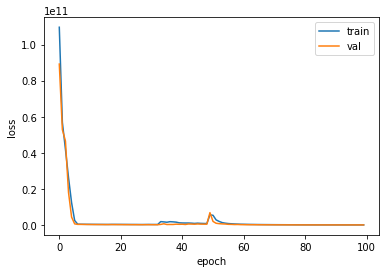

In [181]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

In [182]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Train RMSE: {train_rmse.round(2)}")
print(f"Test RMSE: {test_rmse.round(2)}")

Train RMSE: 2637.73
Test RMSE: 2113.76


### Plot 작성

In [183]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test,
                    mode='lines',
                    name='test'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=test_pred.ravel(),
                    line=dict(dash='dash', width=3),
                    name='pred'))

fig.update_layout(
    title="기아 종가 실제값-예측값",
    height=500)
fig.show()

## 현대자동차 종가 예측 Model 작성

### 데이터 분할

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
X = np.array(total_df.loc[:, ['현대자동차 시가', '현대자동차 고가', '현대자동차 저가', '현대자동차 거래량']])
y = np.array(closing_price_df.loc[:, '현대자동차 종가'])

In [47]:
scale = MinMaxScaler()

# 정규화 적용
X = scale.fit_transform(total_df)
print(X.shape)
X = X[..., np.newaxis] # 차원 증가 (16, ) -> (16, 1)
print(X.shape)

(1598, 16)
(1598, 16, 1)


In [48]:
# train:test - 8:2 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# train:val - 8:2 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [49]:
X_train.shape, y_train.shape

((1022, 16, 1), (1022,))

In [50]:
print(X[0].shape)
X[0], y[0]

(16, 1)


(array([[0.85933504],
        [0.84789009],
        [0.98910675],
        [0.1938326 ],
        [0.85063291],
        [0.77981651],
        [0.98257406],
        [0.19303338],
        [0.90508021],
        [0.89203085],
        [1.        ],
        [0.19580838],
        [0.03828014],
        [0.02396219],
        [0.1829529 ],
        [0.06554278]]), 239500)

### Model 생성

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

In [52]:
model = Sequential()
model.add(SimpleRNN(8, activation='relu', input_shape=(4, 1)))
model.add(Dense(1))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 80        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [55]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
32/32 [==============================] - 1s 20ms/step - loss: 22746179584.0000 - mse: 22746179584.0000 - val_loss: 22410315776.0000 - val_mse: 22410315776.0000
Epoch 2/30
32/32 [==============================] - 0s 12ms/step - loss: 22746161152.0000 - mse: 22746161152.0000 - val_loss: 22410295296.0000 - val_mse: 22410295296.0000
Epoch 3/30
32/32 [==============================] - 0s 12ms/step - loss: 22746132480.0000 - mse: 22746132480.0000 - val_loss: 22410264576.0000 - val_mse: 22410264576.0000
Epoch 4/30
32/32 [==============================] - 0s 12ms/step - loss: 22746091520.0000 - mse: 22746091520.0000 - val_loss: 22410209280.0000 - val_mse: 22410209280.0000
Epoch 5/30
32/32 [==============================] - 0s 13ms/step - loss: 22746001408.0000 - mse: 22746001408.0000 - val_loss: 22410029056.0000 - val_mse: 22410029056.0000
Epoch 6/30
32/32 [==============================] - 0s 12ms/step - loss: 22745239552.0000 - mse: 22745239552.0000 - val_loss: 22407907328.0000 - 

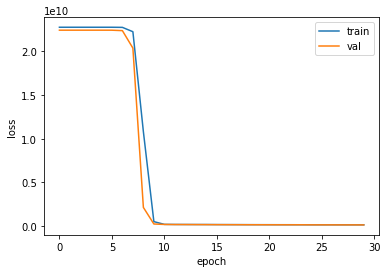

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Train RMSE: {train_rmse.round(2)}")
print(f"Test RMSE: {test_rmse.round(2)}")

Train RMSE: 11814.77
Test RMSE: 9977.42


### Plot 작성

In [58]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test,
                    mode='lines',
                    name='test'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=test_pred.ravel(),
                    line=dict(dash='dash', width=3),
                    name='pred'))

fig.update_layout(
    title="현대자동차 종가 실제값-예측값",
    height=500)
fig.show()

## 만도 종가 예측 Model 작성

### 데이터 분할

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
X = np.array(total_df.loc[:, ['만도 시가', '만도 고가', '만도 저가', '만도 거래량']])
y = np.array(closing_price_df.loc[:, '만도 종가'])

In [62]:
scale = MinMaxScaler()

# 정규화 적용
X = scale.fit_transform(total_df)
print(X.shape)
X = X[..., np.newaxis] # 차원 증가 (16, ) -> (16, 1)
print(X.shape)

(1598, 16)
(1598, 16, 1)


In [63]:
# train:test - 8:2 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# train:val - 8:2 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [64]:
X_train.shape, y_train.shape

((1022, 16, 1), (1022,))

In [65]:
print(X[0].shape)
X[0], y[0]

(16, 1)


(array([[0.85933504],
        [0.84789009],
        [0.98910675],
        [0.1938326 ],
        [0.85063291],
        [0.77981651],
        [0.98257406],
        [0.19303338],
        [0.90508021],
        [0.89203085],
        [1.        ],
        [0.19580838],
        [0.03828014],
        [0.02396219],
        [0.1829529 ],
        [0.06554278]]), 66500)

### Model 생성

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

In [67]:
model = Sequential()
model.add(LSTM(8, activation='relu', input_shape=(4, 1)))
model.add(Dense(1))

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [70]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
32/32 [==============================] - 2s 31ms/step - loss: 26461024256.0000 - mse: 26461024256.0000 - val_loss: 25906429952.0000 - val_mse: 25906429952.0000
Epoch 2/30
32/32 [==============================] - 1s 26ms/step - loss: 26460997632.0000 - mse: 26460997632.0000 - val_loss: 25906405376.0000 - val_mse: 25906405376.0000
Epoch 3/30
32/32 [==============================] - 1s 27ms/step - loss: 26460956672.0000 - mse: 26460956672.0000 - val_loss: 25906331648.0000 - val_mse: 25906331648.0000
Epoch 4/30
32/32 [==============================] - 1s 26ms/step - loss: 26458019840.0000 - mse: 26458019840.0000 - val_loss: 25887694848.0000 - val_mse: 25887694848.0000
Epoch 5/30
32/32 [==============================] - 1s 25ms/step - loss: 26012393472.0000 - mse: 26012393472.0000 - val_loss: 23578437632.0000 - val_mse: 23578437632.0000
Epoch 6/30
32/32 [==============================] - 1s 26ms/step - loss: 15831814144.0000 - mse: 15831814144.0000 - val_loss: 11862166528.0000 - 

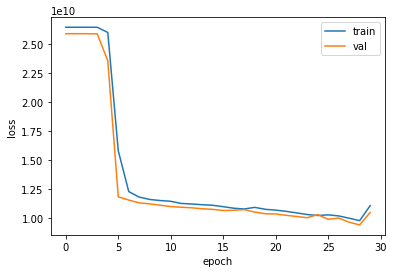

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Train RMSE: {train_rmse.round(2)}")
print(f"Test RMSE: {test_rmse.round(2)}")

Train RMSE: 103900.84
Test RMSE: 49423.79


### Plot 작성

In [73]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test,
                    mode='lines',
                    name='test'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=test_pred.ravel(),
                    line=dict(dash='dash', width=3),
                    name='pred'))

fig.update_layout(
    title="만도 종가 실제값-예측값",
    height=500)
fig.show()

## 덕양산업 종가 예측 Model 작성

### 데이터 분할

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
X = np.array(total_df.loc[:, ['덕양산업 시가', '덕양산업 고가', '덕양산업 저가', '덕양산업 거래량']])
y = np.array(closing_price_df.loc[:, '덕양산업 종가'])

In [77]:
scale = MinMaxScaler()

# 정규화 적용
X = scale.fit_transform(total_df)
print(X.shape)
X = X[..., np.newaxis] # 차원 증가 (16, ) -> (16, 1)
print(X.shape)

(1598, 16)
(1598, 16, 1)


In [78]:
# train:test - 8:2 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# train:val - 8:2 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [79]:
X_train.shape, y_train.shape

((1022, 16, 1), (1022,))

In [80]:
print(X[0].shape)
X[0], y[0]

(16, 1)


(array([[0.85933504],
        [0.84789009],
        [0.98910675],
        [0.1938326 ],
        [0.85063291],
        [0.77981651],
        [0.98257406],
        [0.19303338],
        [0.90508021],
        [0.89203085],
        [1.        ],
        [0.19580838],
        [0.03828014],
        [0.02396219],
        [0.1829529 ],
        [0.06554278]]), 4300)

### Model 생성

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

In [82]:
model = Sequential()
model.add(SimpleRNN(8, activation='relu', input_shape=(4, 1)))
model.add(Dense(1))

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8)                 80        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [85]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
32/32 [==============================] - 1s 18ms/step - loss: 3375309.0000 - mse: 3375309.0000 - val_loss: 3289516.0000 - val_mse: 3289516.0000
Epoch 2/30
32/32 [==============================] - 0s 12ms/step - loss: 3374717.5000 - mse: 3374717.5000 - val_loss: 3289048.5000 - val_mse: 3289048.5000
Epoch 3/30
32/32 [==============================] - 0s 13ms/step - loss: 3373951.7500 - mse: 3373951.7500 - val_loss: 3287564.2500 - val_mse: 3287564.2500
Epoch 4/30
32/32 [==============================] - 0s 13ms/step - loss: 3343817.7500 - mse: 3343817.7500 - val_loss: 3093772.5000 - val_mse: 3093772.5000
Epoch 5/30
32/32 [==============================] - 0s 13ms/step - loss: 1432840.7500 - mse: 1432840.7500 - val_loss: 230895.2812 - val_mse: 230895.2812
Epoch 6/30
32/32 [==============================] - 0s 12ms/step - loss: 199237.0781 - mse: 199237.0781 - val_loss: 134346.8906 - val_mse: 134346.8906
Epoch 7/30
32/32 [==============================] - 0s 14ms/step - loss: 138

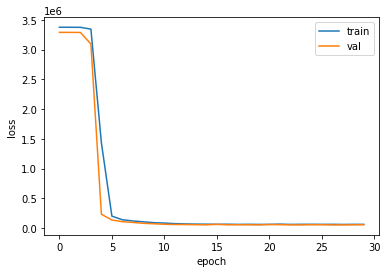

In [86]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Train RMSE: {train_rmse.round(2)}")
print(f"Test RMSE: {test_rmse.round(2)}")

Train RMSE: 247.84
Test RMSE: 633.84


### Plot 작성

In [88]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test,
                    mode='lines',
                    name='test'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=test_pred.ravel(),
                    line=dict(dash='dash', width=3),
                    name='pred'))

fig.update_layout(
    title="덕양산업 종가 실제값-예측값",
    height=500)
fig.show()